## Линейная регрессия при помощи библиотеки sklearn

In [10]:
# Импортируем модель линейной регрессии
from sklearn.linear_model import LinearRegression

Для обучения возьмем данные о ценах на дома в Бостоне. https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset

In [26]:
# Функция для загрузки встроенного датасета
from sklearn.datasets import load_boston

# Сразу делим данные на матрицу признаков X и вектор с целевой переменно y
X, y = load_boston(return_X_y=True)

# Посмотрим на размер матрицы признаков
print(X.shape)

(506, 13)


В нашей матрице признаков 506 строк и 13 столбцов, сколько признаков имеет наш датасет?

Линейная регрессия использует градиентный спуск для поиска экстремумма функции, для этого функция дожна быть выпуклой, проверим это визаализируя данные.

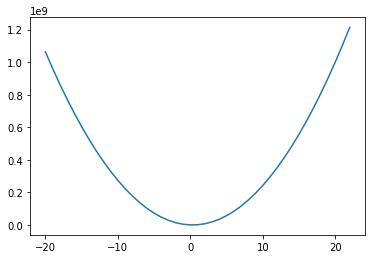

In [35]:
import numpy as np
import matplotlib.pyplot as plt

abscss = range(-20, 23)
mses = list()

for coef in abscss:
    pred_values = np.array([coef * np.mean(x) for x in X])
    mses.append(np.sum((y - pred_values)**2))
    
plt.plot(abscss, mses);

## Создание и обучение модели
Модель sklearn создается так: `model = LinearRegression()`

Обучение модели в sklearn происходит при помощи метода `fit()` этому методу на вход подаются матрица признаков и значения целевой переменной.

Для того, чтобы построить предсказания, для оценки качества модели, обучим линейную регрессию на первых 500 наблюдениях, а затем предскажем оставшиеся 6

In [12]:
# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель
model.fit(X[:500], y[:500])

LinearRegression()

## Предсказание

Для предсказания при помощи обученой модели в sklearn используется метод `predict()` ему на вход подается матрица признаков и он возвращает вектор(или матрицу) с предсказанными значениями целевой переменной

In [13]:
preds = model.predict(X[500:])

print(preds)

[20.67313667 23.99202547 22.86600965 28.17894777 26.65926677 22.84943851]


## Оценка качества модели

Для того, чтобы понять хорошо или плохо модель справляется с задачей смотрят на различные метрики. Давайте сначала импортируем среднеквадратичную ошибку и посмотрим на результат.

В sklearn метрики находятся в модуле `metrics`

In [14]:
# Импортируем MSE
from sklearn.metrics import mean_squared_error

# На вход функция принимает вектор предсказанных и настоящих значений целевой переменной
mse = mean_squared_error(preds, y[500:])

print(mse)

30.42981616181721


Среднеквадратичная ошибка составила 30.4 - но по одному такому значению тяжело судить о качестве модели, поэтому сравним ее корень (RMSE) со средним значением целевой переменной

In [15]:
# Корень из среднеквадратичной ошибки
rmse = mse ** .5

print("Среднее значение целевой переменной:", y.mean())
print("RMSE:", rmse)

Среднее значение целевой переменной: 22.532806324110677
RMSE: 5.516322702835396


Как видно наша модель ошибается в среднем на 20%